In [110]:
trials = ['FACTORY','D50','D100','D150']
subjectslist = ['Subject12']
number_param = 'FoffFraction'
vector_param = 'AnkleAnglesX'

import pickle
import numpy as np
from matplotlib import pyplot as plt
subjects = {}
for n in subjectslist:
    file = n + '.pkl'
    fileopen = open(file, 'rb')
    subjects[n] = pickle.load(fileopen)
    fileopen.close()
    trialnames = list(set(subjects[n].keys()))
print(subjectslist)

['Subject12']


In [111]:
tempsubjects = subjectslist.copy()
for subject in tempsubjects:
    for trial in trials:
        if not subjects[subject][trial]:
            try:
                subjectslist.remove(subject)
                print('WARNING: %s has no trial for %s, subject has been removed from analysis.' %(subject,trial))
            except ValueError:
                print('WARNING: %s has no trial for %s, has already been removed from analysis.' %(subject,trial))   
        elif ('Left'+number_param and 'Right'+number_param) not in subjects[subject][trial]:
            try:
                subjectslist.remove(subject)
                print('WARNING: %s has no %s in trial %s, subject has been removed from analysis.' %(subject,number_param,trial))
            except ValueError:
                print('WARNING: %s has no %s in trial %s, has already been removed from analysis.' %(subject,number_param,trial))
        elif ('L'+vector_param and 'R'+vector_param) not in subjects[subject][trial]:
            try:
                subjectslist.remove(subject)
                print('WARNING: %s has no %s in trial %s, subject has been removed from analysis.' %(subject,vector_param,trial))
            except ValueError:
                print('WARNING: %s has no %s in trial %s, has already been removed from analysis.' %(subject,vector_param,trial))
paramnames = [x for x in subjects[subjectslist[0]][trials[0]] if type(subjects[subjectslist[0]][trials[0]][x]) is (float or int)]
print('Number parameters:')
print(sorted(paramnames))
vectornames = [x for x in subjects[subjectslist[0]][trials[0]] if type(subjects[subjectslist[0]][trials[0]][x]) is list]
print('Vector parameters:')
print(sorted(vectornames))
othernames = [x for x in subjects[subjectslist[0]][trials[0]] if type(subjects[subjectslist[0]][trials[0]][x])!=(list and float and int)]
print('Other parameters:')
print(sorted(othernames))

Number parameters:
['LeftFoffFraction', 'LeftSpeed', 'LeftSpeedCalc', 'LeftStepLen', 'LeftStepTime', 'LeftStrideLen', 'RightFoffFraction', 'RightSpeed', 'RightSpeedCalc', 'RightStepLen', 'RightStepTime', 'RightStrideLen']
Vector parameters:
['LANKX', 'LANKY', 'LANKZ', 'LASIX', 'LASIY', 'LASIZ', 'LAbsAnkleAngleX', 'LAbsAnkleAngleY', 'LAbsAnkleAngleZ', 'LAnkleAnglesX', 'LAnkleAnglesY', 'LAnkleAnglesZ', 'LFootProgressAnglesX', 'LFootProgressAnglesY', 'LFootProgressAnglesZ', 'LHEEX', 'LHEEY', 'LHEEZ', 'LHipAnglesX', 'LHipAnglesY', 'LHipAnglesZ', 'LKNEX', 'LKNEY', 'LKNEZ', 'LKneeAnglesX', 'LKneeAnglesY', 'LKneeAnglesZ', 'LPSIX', 'LPSIY', 'LPSIZ', 'LPelvisAnglesX', 'LPelvisAnglesY', 'LPelvisAnglesZ', 'LTHIX', 'LTHIY', 'LTHIZ', 'LTIBX', 'LTIBY', 'LTIBZ', 'LTOEX', 'LTOEY', 'LTOEZ', 'LeftAnkleAngle', 'RANKX', 'RANKY', 'RANKZ', 'RASIX', 'RASIY', 'RASIZ', 'RAbsAnkleAngleX', 'RAbsAnkleAngleY', 'RAbsAnkleAngleZ', 'RAnkleAnglesX', 'RAnkleAnglesY', 'RAnkleAnglesZ', 'RFootProgressAnglesX', 'RFootProgr

In [112]:
for subject in subjectslist:
    for trial in trials:
        for side in ['L','R']:
            try:
                toe = subjects[subject][trial][side+'TOEZ']
                subjects[subject][trial][side+'MaxtoeZ'] = max(toe[int(len(toe)*0.2):int(len(toe)*0.8)]) - min(toe)
                subjects[subject][trial][side+'MintoeZ'] = min(toe[int(len(toe)*0.2):int(len(toe)*0.8)]) - min(toe)
            except KeyError:
                continue

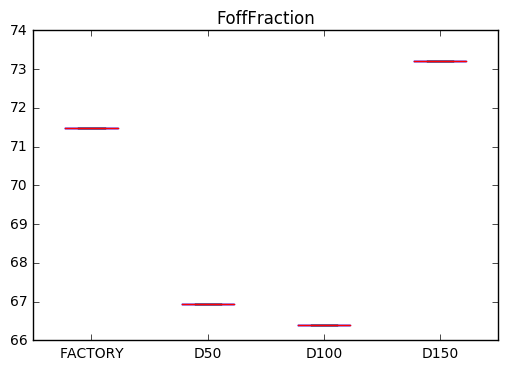

In [113]:
analysis = number_param
data = [[] for _ in range(len(trials))]
for subjectnum in range(len(subjectslist)):
    subject = subjectslist[subjectnum]
    fesside = subjects[subject][trials[0]]['AffectedSide']
    for trialnum in range(len(trials)):
        try:
            trial = trials[trialnum]
            data[trialnum].append(subjects[subject][trial][fesside+analysis])
        except KeyError:
            continue

%matplotlib inline
box = plt.boxplot(data, labels=trials)
plt.title(analysis)

Subject12 FACTORY original length: 319
Subject12 D50 original length: 369
Subject12 D100 original length: 366
Subject12 D150 original length: 336


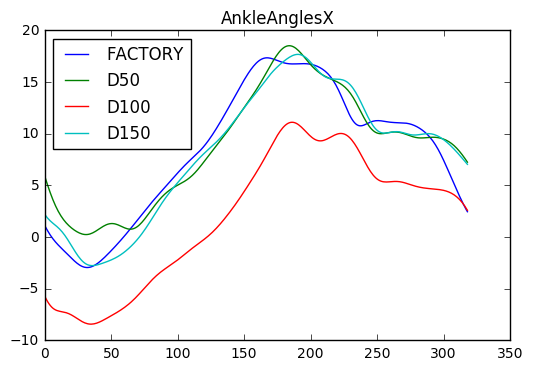

In [114]:
vector = vector_param
# make list of lists: lists 1->len(subjectslist) for trial 1, next set for trial 2, etc.
array = [[] for _ in range(len(subjectslist)*len(trials))]
for subjectnum in range(len(subjectslist)):
    subject = subjectslist[subjectnum]
    fesside = subjects[subject][trials[0]]['AffectedSide'][0]
    for trialnum in range(len(trials)):
        trial = trials[trialnum]
        array[subjectnum+(trialnum*len(subjectslist))] = subjects[subject][trial][fesside+vector]
        print('%s %s original length: %s' %(subject,trial,len(array[subjectnum+(trialnum*len(subjectslist))])))

# make all lists same length
# FUCK THIS USE THAT http://stackoverflow.com/questions/31003155/plotting-two-different-arrays-of-different-lengths
shortest = len(min(array,key=len))
for n in range(len(array)):
    line = array[n]
    extra = int(shortest/len(line))
    if extra >1:
        del line[::extra]
    array[n] = line[:shortest]

# average subjects in each trial
avg_per_trial = [[] for _ in range(len(trials))]
for trialnum in range(len(trials)):
    trial = trials[trialnum]
    for n in range(len(array[0])):
        trialpoint = [array[x+trialnum*len(subjectslist)][n] for x in range(len(subjectslist))]
        avg_per_trial[trialnum].append(sum(trialpoint)/len(trialpoint))

# plot it
for trialnum in range(len(trials)):
    plt.plot(avg_per_trial[trialnum], label=trials[trialnum])
plt.legend(loc=2)
plt.title(vector)

In [115]:
trial = 2 * 4
for num in range(trial,trial+len(subjectslist)):
    plt.plot(array[num], label=subjectslist[num-trial])
plt.legend(loc=0)
plt.title(vector)

IndexError: list index out of range